Kriging model to predict DBH of trees. Testing out how the model works. Based off of code from https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_kriging.ipynb

Imports

In [1]:
import geostatspy.GSLIB as GSLIB                        # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                  # GSLIB methods convert to Python 
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import os                                               # to set current working directory 
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting

Loading in the data. 100 trees of synthetic data that Charles generated

In [2]:
fraction_data = 1.0

df = pd.read_csv("../data/1000_trees_spatial.csv") 

if fraction_data < 1.0:
    df = df.sample(frac = fraction_data,replace = False,random_state = 73073)
df = df.reset_index()
df = df.iloc[:,1:] # excludes first columns, which is the index. 
print(df.head())

        dbh    species     x_pos      y_pos
0  0.205288   oak tree  8.815514  10.997415
1  0.301855  pine tree  7.895240   9.050172
2  0.282535  pine tree  4.398173   9.282438
3  0.204056   oak tree  7.651061   1.671802
4  0.287978   oak tree  4.894493   7.916996


some stats

In [3]:
print(df.describe().transpose())

        count      mean       std       min       25%       50%       75%  \
dbh    1000.0  0.225138  0.047320  0.118364  0.189283  0.220274  0.258005   
x_pos  1000.0  6.166825  3.484326  0.004157  3.193588  6.251270  9.210799   
y_pos  1000.0  5.979333  3.514977  0.007042  2.949760  5.862608  9.103450   

             max  
dbh     0.401343  
x_pos  11.998779  
y_pos  11.977424  


distribution of the DBH values

In [ ]:
OK = OrdinaryKriging(df['x_pos'], df['y_pos'], df['dbh'], variogram_model = "linear", verbose = True, enable_plotting = False)
gridx = np.arange(0, 13, 1)
gridy = np.arange(0, 13, 1)
z, ss = OK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

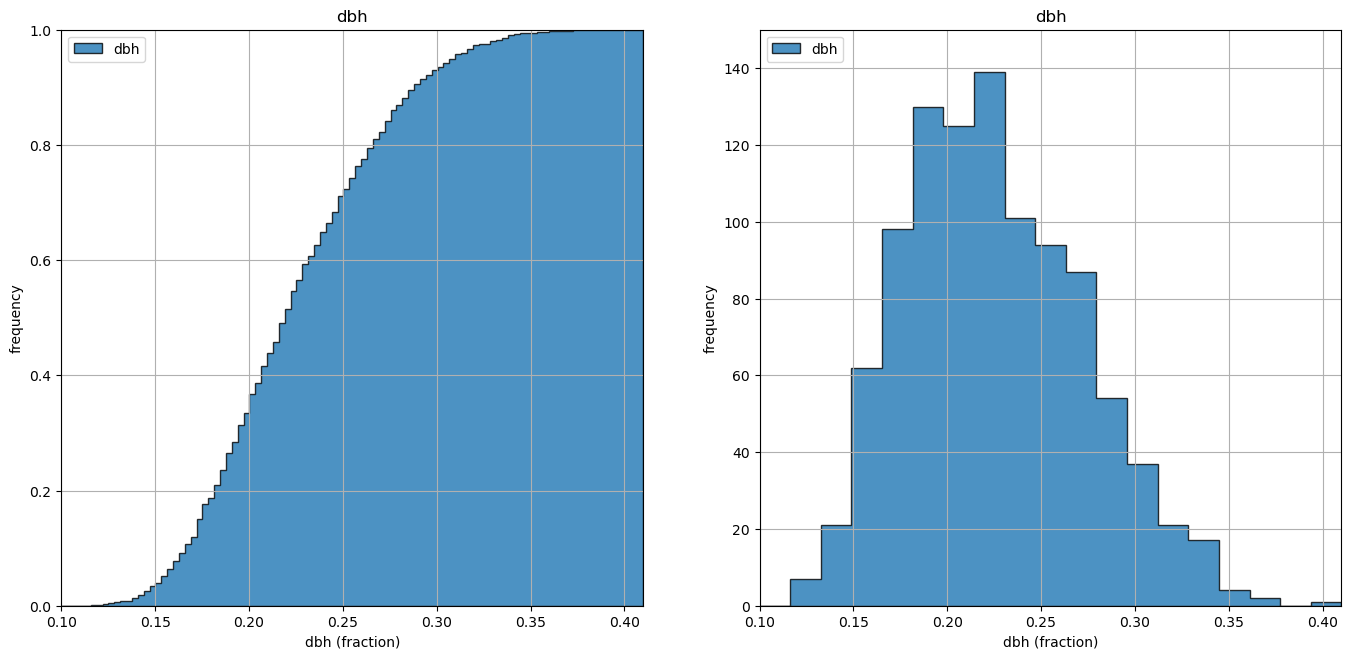

In [4]:
xmin = 0.0; xmax = 12.0
ymin = 0.0; ymax = 12.0
vmin = 0.10; vmax = 0.41

plt.subplot(121) # This creates a subplot grid with 1 row and 1 columns and selects the first subplot (index 1).
plt.hist(df['dbh'],bins=np.linspace(vmin,vmax,100),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',label='dbh')
# bins = np.linspace defines the bin edges for the histogram - 1000 bins btwn 0.0 and 0.25. 
# alpha = transparency
# density = True -> normalizes to become a probability density
plt.xlim([vmin,vmax]); plt.ylim([0,1.0])
plt.xlabel('dbh (fraction)'); plt.ylabel('frequency'); plt.title('dbh')
plt.legend(loc='upper left')
plt.grid(True)


plt.subplot(122) 
plt.hist(df['dbh'],bins=np.linspace(vmin,vmax,20),histtype="stepfilled",alpha=0.8,edgecolor='black',label='dbh')
plt.xlim([vmin, vmax]); plt.ylim([0,150])
plt.xlabel('dbh (fraction)'); plt.ylabel('frequency'); plt.title('dbh')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

The original tutorial performed de-clustering on the data, but excluded details on how to do so. I'm going to try to move forward with kriging and then look into the de-clustering later. 

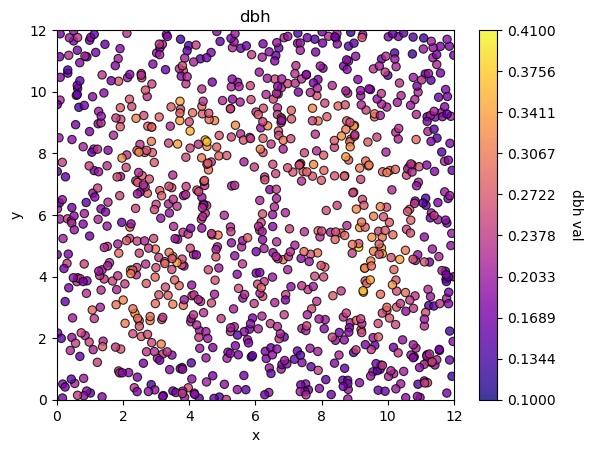

In [5]:
xsiz = 1; ysiz = 1
nx = 10; ny = 10
xmn = 0.0; ymn = 0.0

cmap = plt.cm.plasma
plt.subplot(111)

GSLIB.locmap_st(df, 'x_pos', 'y_pos', 'dbh', xmin, xmax, ymin, ymax, vmin, vmax, 'dbh', 'x', 'y', 'dbh val', cmap)

# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.3, hspace=0.3)
plt.show()

In [6]:
skmean_dbh = 0.225;                        # simple kriging mean (used if simple kriging is selected below)
ktype = 0                                  # kriging type, 0 - simple, 1 - ordinary
radius = 4                                 # search radius for neighbouring data
nxdis = 2; nydis = 2                       # number of grid discretizations for block kriging (not tested)
ndmin = 0; ndmax = 40                      # minimum and maximum data points considered for an estimate
dbh_min = 0.05; dbh_max = 0.45             # min and max values of the estimates

In [7]:
dbh_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=45,hmaj1=300,hmin1=300)
dbh_kmap, dbh_vmap = geostats.kb2d(df,'x_pos','y_pos','dbh',dbh_min,dbh_max,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_dbh,dbh_vario)

plt.subplot(111)
GSLIB.locpix_st(dbh_kmap,xmin,xmax,ymin,ymax,xsiz,0.0,0.25,df,'x_pos','y_pos','dbh','Simple Kriging Estimates and Data','X(m)','Y(m)','dbh',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.3, hspace=0.3); plt.show()

NameError: name 'real' is not defined